Assignment 1
venkateswara Rao jammula

using tensorflow.keras.datasets to get imdb data set

In [73]:
from tensorflow.keras.datasets import imdb

(train_data_new, train_labels_new), (test_data_new, test_labels_new) = imdb.load_data(
    num_words=10000)


In [74]:
train_data_sample = train_data_new[0]
train_labels_sample = train_labels_new[0]
max_word_index = max([max(sequence) for sequence in train_data_new])

In [75]:
word_index_new = imdb.get_word_index()
reverse_word_index_new = dict(
    [(value, key) for (key, value) in word_index_new.items()])
decoded_review_new = " ".join(
    [reverse_word_index_new.get(i - 3, "?") for i in train_data_sample])


In [76]:
import numpy as np

def vectorize_sequences_new(sequences, dimension=10000):
    results_new = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results_new[i, j] = 1.
    return results_new


Vectorizing Training and testing data

In [77]:
x_train_new = vectorize_sequences_new(train_data_new)
x_test_new = vectorize_sequences_new(test_data_new)
y_train_new = np.asarray(train_labels_new).astype("float32")
y_test_new = np.asarray(test_labels_new).astype("float32")


Using Relu Function To Build the model

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model_new = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [79]:
model_new.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])


In [80]:
x_val_new = x_train_new[:10000]
partial_x_train_new = x_train_new[10000:]
y_val_new = y_train_new[:10000]
partial_y_train_new = y_train_new[10000:]


Traning the model with Batch size 512 and 20 epochs

In [81]:
history_new = model_new.fit(partial_x_train_new,
                            partial_y_train_new,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val_new, y_val_new))


Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5300 - accuracy: 0.7801 - val_loss: 0.4067 - val_accuracy: 0.8576
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3293 - accuracy: 0.8928 - val_loss: 0.3155 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2456 - accuracy: 0.9176 - val_loss: 0.2846 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1993 - accuracy: 0.9328 - val_loss: 0.2886 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1642 - accuracy: 0.9464 - val_loss: 0.2782 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1419 - accuracy: 0.9525 - val_loss: 0.2951 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1206 - accuracy: 0.9634 - val_loss: 0.2998 - val_accuracy: 0.8827
Epoch 8/20
30

In [82]:
history_dict_new = history_new.history
history_keys_new = history_dict_new.keys()


Graph: Traning vs Validation loss

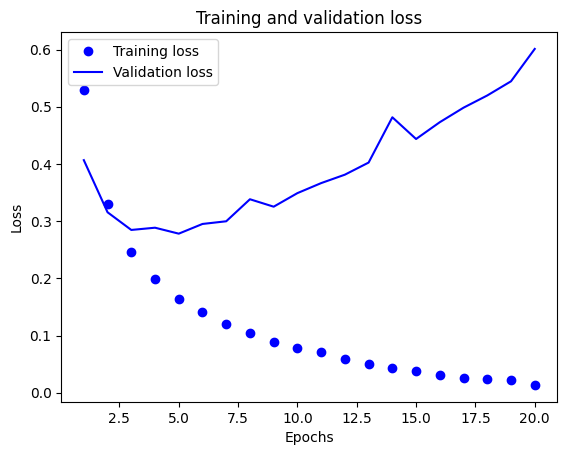

In [83]:
import matplotlib.pyplot as plt

history_dict_new = history_new.history
loss_values_new = history_dict_new["loss"]
val_loss_values_new = history_dict_new["val_loss"]
epochs_new = range(1, len(loss_values_new) + 1)

plt.plot(epochs_new, loss_values_new, "bo", label="Training loss")
plt.plot(epochs_new, val_loss_values_new, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Graph: traning vs Validation Loss

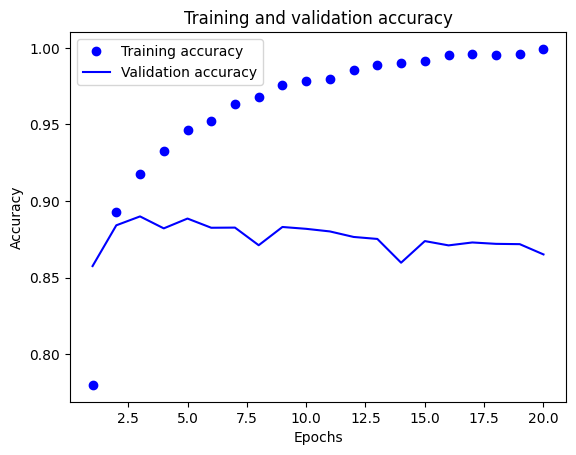

In [84]:
plt.clf()
acc_new = history_dict_new["accuracy"]
val_acc_new = history_dict_new["val_accuracy"]
plt.plot(epochs_new, acc_new, "bo", label="Training accuracy")
plt.plot(epochs_new, val_acc_new, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Model 1 Traning

In [85]:
# Previous code to create and compile the model
model_new = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_new.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
model_new.fit(x_train_new, y_train_new, epochs=4, batch_size=512)

# To make predictions, use model_new.predict(x_test_new)
predictions = model_new.predict(x_test_new)

# To access evaluation results, you can use results_new
results_new = model_new.evaluate(x_test_new, y_test_new)

# Print or use the predictions and results as needed
print("Predictions:", predictions)
print("Evaluation results:", results_new)


Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4586 - accuracy: 0.8137
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2713 - accuracy: 0.9048
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2134 - accuracy: 0.9256
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2881 - accuracy: 0.8842
Predictions: [[0.17949854]
 [0.9994035 ]
 [0.7606665 ]
 ...
 [0.10999981]
 [0.06123783]
 [0.58626384]]
Evaluation results: [0.2880991995334625, 0.8842399716377258]


Model 2

In [86]:
# Create and compile the new model (model_2)
model_2_new = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2_new.compile(optimizer="rmsprop",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

# Train the new model
model_2_new.fit(x_train_new, y_train_new, epochs=5, batch_size=512)

# Evaluate the new model on the test data
results_new = model_2_new.evaluate(x_test_new, y_test_new)

# Print or use the evaluation results as needed
print("Evaluation results for model_2_new:", results_new)


Epoch 1/5
49/49 [==============================] - 1s 10ms/step - loss: 0.4554 - accuracy: 0.8188
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2686 - accuracy: 0.9038
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2111 - accuracy: 0.9224
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.1797 - accuracy: 0.9355
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3089 - accuracy: 0.8791
Evaluation results for model_2_new: [0.3088674247264862, 0.8791199922561646]


Model with 3 layers

In [87]:
# Create and compile the new model (model_3)
model_3_new = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_new.compile(optimizer="rmsprop",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

# Train the new model
history_3_new = model_3_new.fit(partial_x_train_new,
                                partial_y_train_new,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_val_new, y_val_new))

# Get the history dictionary
history_dict_3_new = history_3_new.history
history_keys_3_new = history_dict_3_new.keys()


Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5593 - accuracy: 0.7607 - val_loss: 0.4195 - val_accuracy: 0.8579
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3360 - accuracy: 0.8911 - val_loss: 0.3156 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2431 - accuracy: 0.9168 - val_loss: 0.3504 - val_accuracy: 0.8572
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1954 - accuracy: 0.9320 - val_loss: 0.2786 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1589 - accuracy: 0.9447 - val_loss: 0.3091 - val_accuracy: 0.8784
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1350 - accuracy: 0.9545 - val_loss: 0.3140 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1104 - accuracy: 0.9659 - val_loss: 0.3232 - val_accuracy: 0.8751
Epoch 8/20
30

Graph: Training vs Validation loss

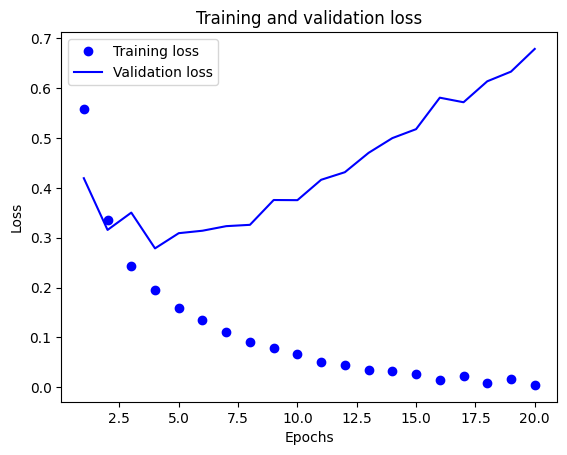

In [88]:
# Get loss values from the history of model_3_new
loss_values_3_new = history_dict_3_new["loss"]
val_loss_values_3_new = history_dict_3_new["val_loss"]
epochs_3_new = range(1, len(loss_values_3_new) + 1)

# Plot the training and validation loss
plt.plot(epochs_3_new, loss_values_3_new, "bo", label="Training loss")
plt.plot(epochs_3_new, val_loss_values_3_new, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Graph: Traning vs Validation Accuracy

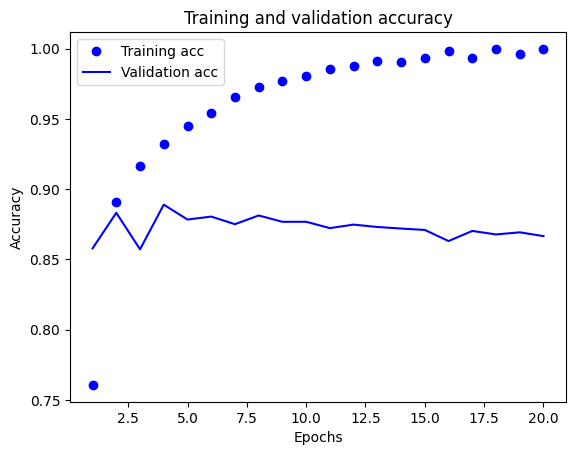

In [89]:
# Clear the current figure
plt.clf()

# Get accuracy values from the history of model_3_new
acc_3_new = history_dict_3_new["accuracy"]
val_acc_3_new = history_dict_3_new["val_accuracy"]

# Plot the training and validation accuracy
plt.plot(epochs_3_new, acc_3_new, "bo", label="Training acc")
plt.plot(epochs_3_new, val_acc_3_new, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [90]:
# Train model_3_new
model_3_new.fit(x_train_new, y_train_new, epochs=12, batch_size=512)

# Evaluate model_3_new on the test data
results_model_3_new = model_3_new.evaluate(x_test_new, y_test_new)

# Print or use the evaluation results as needed
print("Evaluation results for model_3_new:", results_model_3_new)


Epoch 1/12
49/49 [==============================] - 1s 10ms/step - loss: 0.2109 - accuracy: 0.9453
Epoch 2/12
49/49 [==============================] - 0s 10ms/step - loss: 0.1273 - accuracy: 0.9596
Epoch 3/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0988 - accuracy: 0.9688
Epoch 4/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0756 - accuracy: 0.9775
Epoch 5/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0596 - accuracy: 0.9821
Epoch 6/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0448 - accuracy: 0.9869
Epoch 7/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0354 - accuracy: 0.9894
Epoch 8/12
49/49 [==============================] - 1s 10ms/step - loss: 0.0271 - accuracy: 0.9923
Epoch 9/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0198 - accuracy: 0.9944
Epoch 10/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0153 - accuracy: 0.9959
Epoch 11/

Hypertuning

In [91]:
# Create and compile the new model (model_31)
model_31_new = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_31_new.compile(optimizer="rmsprop",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

# Train the new model
history_31_new = model_31_new.fit(partial_x_train_new,
                                  partial_y_train_new,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_val_new, y_val_new))

# Get the history dictionary
history_dict_31_new = history_31_new.history
history_keys_31_new = history_dict_31_new.keys()


Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5193 - accuracy: 0.7627 - val_loss: 0.3700 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3062 - accuracy: 0.8897 - val_loss: 0.2976 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2333 - accuracy: 0.9147 - val_loss: 0.2900 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1854 - accuracy: 0.9354 - val_loss: 0.2860 - val_accuracy: 0.8834
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1536 - accuracy: 0.9461 - val_loss: 0.3042 - val_accuracy: 0.8797
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1303 - accuracy: 0.9561 - val_loss: 0.3652 - val_accuracy: 0.8654
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1078 - accuracy: 0.9651 - val_loss: 0.3100 - val_accuracy: 0.8838
Epoch 8/20
30

Graph: Training vs Validation loss

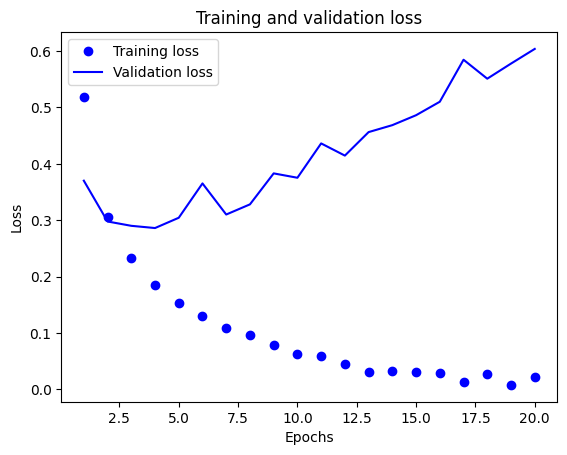

In [92]:
# Get loss values from the history of model_31_new
loss_values_31_new = history_dict_31_new["loss"]
val_loss_values_31_new = history_dict_31_new["val_loss"]
epochs_31_new = range(1, len(loss_values_31_new) + 1)

# Plot the training and validation loss
plt.plot(epochs_31_new, loss_values_31_new, "bo", label="Training loss")
plt.plot(epochs_31_new, val_loss_values_31_new, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Graph : Training vs Validation accuracy

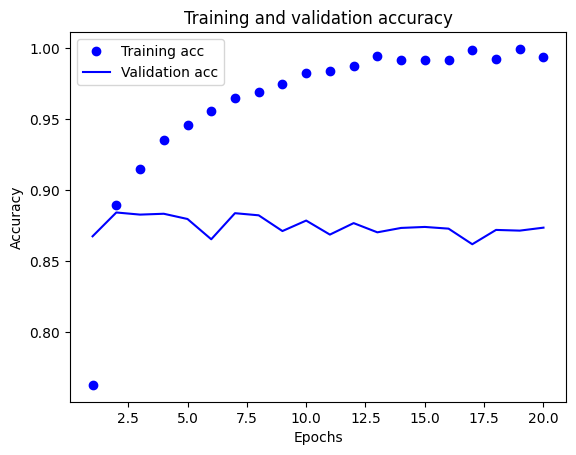

In [93]:
# Clear the current figure
plt.clf()

# Get accuracy values from the history of model_31_new
acc_31_new = history_dict_31_new["accuracy"]
val_acc_31_new = history_dict_31_new["val_accuracy"]

# Plot the training and validation accuracy
plt.plot(epochs_31_new, acc_31_new, "bo", label="Training acc")
plt.plot(epochs_31_new, val_acc_31_new, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [94]:
# Train model_31
model_31_new.fit(x_train_new, y_train_new, epochs=8, batch_size=512)

# Evaluate model_31 on the test data
results_M31 = model_31_new.evaluate(x_test_new, y_test_new)

# Print or use the evaluation results as needed
print("Evaluation results for model_31_new:", results_M31)


Epoch 1/8
49/49 [==============================] - 1s 15ms/step - loss: 0.1960 - accuracy: 0.9475
Epoch 2/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1205 - accuracy: 0.9635
Epoch 3/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0879 - accuracy: 0.9726
Epoch 4/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0627 - accuracy: 0.9816
Epoch 5/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0448 - accuracy: 0.9884
Epoch 6/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0359 - accuracy: 0.9905
Epoch 7/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0231 - accuracy: 0.9944
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.5956 - accuracy: 0.8630
Evaluation results for model_31_new: [0.5955820083618164, 0.8629599809646606]


model trainig with 64 units

In [95]:
# Create and compile the new model (model_32)
model_32_new = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_32_new.compile(optimizer="rmsprop",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

# Train the new model
history_32_new = model_32_new.fit(partial_x_train_new,
                                  partial_y_train_new,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_val_new, y_val_new))

# Get the history dictionary
history_dict_32_new = history_32_new.history
history_keys_32_new = history_dict_32_new.keys()


Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5152 - accuracy: 0.7513 - val_loss: 0.3872 - val_accuracy: 0.8402
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2955 - accuracy: 0.8897 - val_loss: 0.3265 - val_accuracy: 0.8686
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2272 - accuracy: 0.9142 - val_loss: 0.3034 - val_accuracy: 0.8771
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1859 - accuracy: 0.9313 - val_loss: 0.2806 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1484 - accuracy: 0.9441 - val_loss: 0.2916 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1215 - accuracy: 0.9570 - val_loss: 0.3037 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0984 - accuracy: 0.9657 - val_loss: 0.3563 - val_accuracy: 0.8744
Epoch 8/20
30

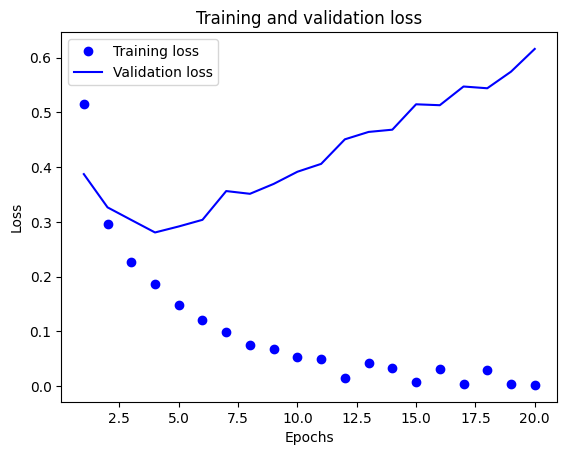

In [96]:
# Get loss values from the history of model_32_new
loss_values_32_new = history_dict_32_new["loss"]
val_loss_values_32_new = history_dict_32_new["val_loss"]
epochs_32_new = range(1, len(loss_values_32_new) + 1)

# Plot the training and validation loss
plt.plot(epochs_32_new, loss_values_32_new, "bo", label="Training loss")
plt.plot(epochs_32_new, val_loss_values_32_new, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [97]:
# Train model_32
model_32_new.fit(x_train_new, y_train_new, epochs=8, batch_size=512)

# Evaluate model_32 on the test data
results_M32 = model_32_new.evaluate(x_test_new, y_test_new)

# Print or use the evaluation results as needed
print("Evaluation results for model_32:", results_M32)


Epoch 1/8
49/49 [==============================] - 1s 17ms/step - loss: 0.1951 - accuracy: 0.9450
Epoch 2/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0975 - accuracy: 0.9688
Epoch 3/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0604 - accuracy: 0.9817
Epoch 4/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0373 - accuracy: 0.9899
Epoch 5/8
49/49 [==============================] - 1s 18ms/step - loss: 0.0227 - accuracy: 0.9935
Epoch 6/8
49/49 [==============================] - 1s 18ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 7/8
49/49 [==============================] - 1s 18ms/step - loss: 0.0158 - accuracy: 0.9953
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.6214 - accuracy: 0.8706
Evaluation results for model_32: [0.621362566947937, 0.8705999851226807]


Training with 128 units

In [98]:
# Create and compile the new model (model_33_new)
model_33_new = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_33_new.compile(optimizer="rmsprop",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

# Train the new model
history_33_new = model_33_new.fit(partial_x_train_new,
                                  partial_y_train_new,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_val_new, y_val_new))

# Get the history dictionary
history_dict_33_new = history_33_new.history
history_keys_33_new = history_dict_33_new.keys()


Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5118 - accuracy: 0.7591 - val_loss: 0.3393 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2865 - accuracy: 0.8874 - val_loss: 0.2992 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2370 - accuracy: 0.9069 - val_loss: 0.2744 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1713 - accuracy: 0.9379 - val_loss: 0.3883 - val_accuracy: 0.8530
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1398 - accuracy: 0.9476 - val_loss: 0.3273 - val_accuracy: 0.8724
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1099 - accuracy: 0.9593 - val_loss: 0.3311 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0815 - accuracy: 0.9721 - val_loss: 0.4327 - val_accuracy: 0.8590
Epoch 8/20
30

Graph:  Training vs Validation loss

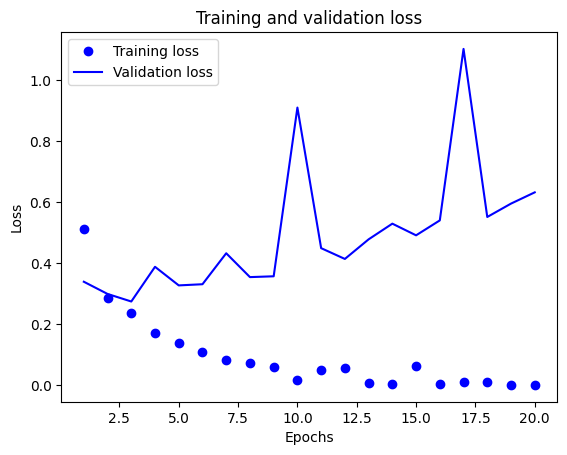

In [99]:
# Get loss values from the history of model_33_new
loss_values_33_new = history_dict_33_new["loss"]
val_loss_values_33_new = history_dict_33_new["val_loss"]
epochs_33_new = range(1, len(loss_values_33_new) + 1)

# Plot the training and validation loss
plt.plot(epochs_33_new, loss_values_33_new, "bo", label="Training loss")
plt.plot(epochs_33_new, val_loss_values_33_new, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Graph: Training Vs Validation accuracy

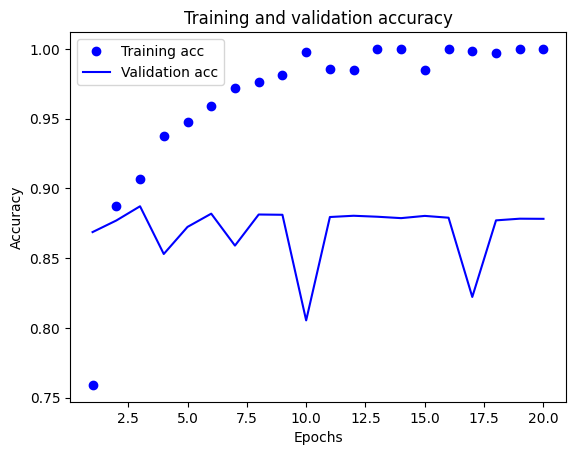

In [100]:
# Clear the current figure
plt.clf()

# Get accuracy values from the history of model_33_new
acc_33_new = history_dict_33_new["accuracy"]
val_acc_33_new = history_dict_33_new["val_accuracy"]

# Plot the training and validation accuracy
plt.plot(epochs_33_new, acc_33_new, "bo", label="Training acc")
plt.plot(epochs_33_new, val_acc_33_new, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [101]:
model_33_new.fit(x_train_new, y_train_new, epochs=8, batch_size=512)
results_M33 = model_33_new.evaluate(x_test_new, y_test_new)
results_M33

Epoch 1/8
49/49 [==============================] - 1s 24ms/step - loss: 0.1859 - accuracy: 0.9445
Epoch 2/8
49/49 [==============================] - 1s 24ms/step - loss: 0.0854 - accuracy: 0.9728
Epoch 3/8
49/49 [==============================] - 1s 23ms/step - loss: 0.0453 - accuracy: 0.9874
Epoch 4/8
49/49 [==============================] - 1s 25ms/step - loss: 0.0244 - accuracy: 0.9934
Epoch 5/8
49/49 [==============================] - 1s 26ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 6/8
49/49 [==============================] - 1s 24ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 7/8
49/49 [==============================] - 1s 23ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.5082 - accuracy: 0.8752


[0.5081655383110046, 0.8751599788665771]

Loss Function

In [102]:
# Create and compile the new model (model_MSE)
model_MSE_new = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE_new.compile(optimizer="rmsprop",
                    loss="mse",
                    metrics=["accuracy"])

# Train the new model
history_MSE_new = model_MSE_new.fit(partial_x_train_new,
                                  partial_y_train_new,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_val_new, y_val_new))

# Get the history dictionary
history_dict_MSE_new = history_MSE_new.history
history_keys_MSE_new = history_dict_MSE_new.keys()


Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1914 - accuracy: 0.7349 - val_loss: 0.1319 - val_accuracy: 0.8621
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1073 - accuracy: 0.8849 - val_loss: 0.1006 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0773 - accuracy: 0.9142 - val_loss: 0.0886 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0624 - accuracy: 0.9293 - val_loss: 0.0849 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0527 - accuracy: 0.9417 - val_loss: 0.0878 - val_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0444 - accuracy: 0.9533 - val_loss: 0.0860 - val_accuracy: 0.8806
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0403 - accuracy: 0.9573 - val_loss: 0.0872 - val_accuracy: 0.8795
Epoch 8/20
30

Graph:Training vs Validation loss

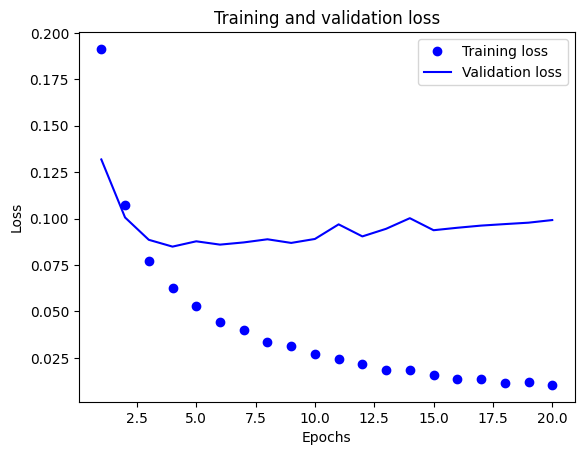

In [103]:
# Get loss values from the history of model_MSE_new
loss_values_MSE_new = history_dict_MSE_new["loss"]
val_loss_values_MSE_new = history_dict_MSE_new["val_loss"]
epochs_MSE_new = range(1, len(loss_values_MSE_new) + 1)

# Plot the training and validation loss
plt.plot(epochs_MSE_new, loss_values_MSE_new, "bo", label="Training loss")
plt.plot(epochs_MSE_new, val_loss_values_MSE_new, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Graph:Training and Validation accuracy

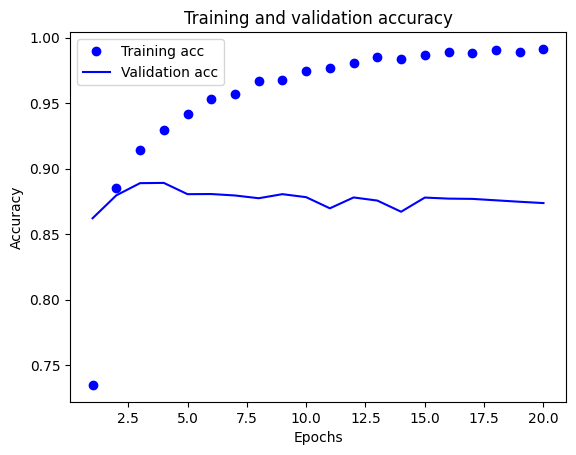

In [104]:
# Clear the current figure
plt.clf()

# Get accuracy values from the history of model_MSE_new
acc_MSE_new = history_dict_MSE_new["accuracy"]
val_acc_MSE_new = history_dict_MSE_new["val_accuracy"]

# Plot the training and validation accuracy
plt.plot(epochs_MSE_new, acc_MSE_new, "bo", label="Training acc")
plt.plot(epochs_MSE_new, val_acc_MSE_new, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [105]:
model_MSE_new.fit(x_train_new, y_train_new, epochs=8, batch_size=512)
results_MSE = model_MSE_new.evaluate(x_test_new, y_test_new)
results_MSE


Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0451 - accuracy: 0.9466
Epoch 2/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0369 - accuracy: 0.9579
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0313 - accuracy: 0.9652
Epoch 4/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0278 - accuracy: 0.9706
Epoch 5/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0261 - accuracy: 0.9728
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0228 - accuracy: 0.9770
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0217 - accuracy: 0.9782
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.1117 - accuracy: 0.8643


[0.11165866255760193, 0.8642799854278564]

model traning using tanh activation function

In [106]:
# Create and compile the new model (tanh_model)
tanh_model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
tanh_model.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

# Train the new model
history_tanh = tanh_model.fit(partial_x_train_new,
                              partial_y_train_new,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val_new, y_val_new))

# Get the history dictionary
history_dict_tanh = history_tanh.history
history_keys_tanh = history_dict_tanh.keys()


Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5048 - accuracy: 0.7911 - val_loss: 0.3768 - val_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3026 - accuracy: 0.8985 - val_loss: 0.3021 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2195 - accuracy: 0.9240 - val_loss: 0.2735 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1749 - accuracy: 0.9381 - val_loss: 0.2836 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1373 - accuracy: 0.9554 - val_loss: 0.3040 - val_accuracy: 0.8821
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1112 - accuracy: 0.9636 - val_loss: 0.3356 - val_accuracy: 0.8747
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0984 - accuracy: 0.9668 - val_loss: 0.3439 - val_accuracy: 0.8774
Epoch 8/20
30

Graph: Traning vs Validation loss

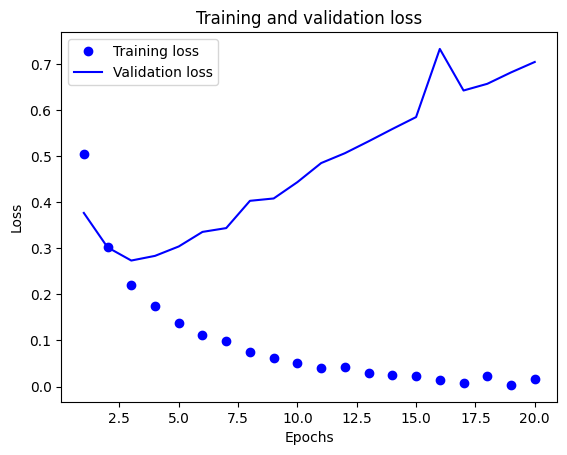

In [107]:
# Get loss values from the history of tanh_model
loss_values_tanh = history_dict_tanh["loss"]
val_loss_values_tanh = history_dict_tanh["val_loss"]
epochs_tanh = range(1, len(loss_values_tanh) + 1)

# Plot the training and validation loss
plt.plot(epochs_tanh, loss_values_tanh, "bo", label="Training loss")
plt.plot(epochs_tanh, val_loss_values_tanh, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Graph :  Training vs Validation accuracy

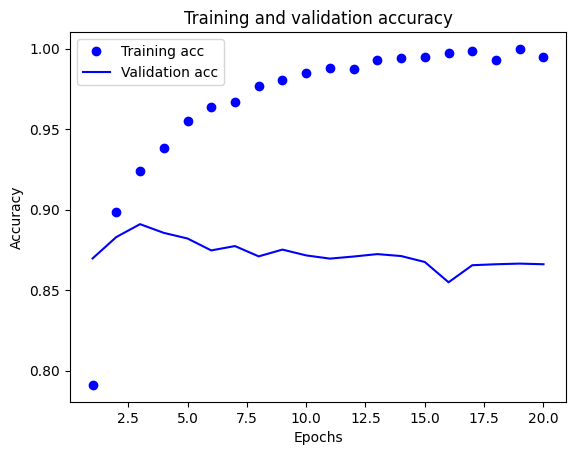

In [108]:
# Clear the current figure
plt.clf()

# Get accuracy values from the history of tanh_model
acc_tanh = history_dict_tanh["accuracy"]
val_acc_tanh = history_dict_tanh["val_accuracy"]

# Plot the training and validation accuracy
plt.plot(epochs_tanh, acc_tanh, "bo", label="Training acc")
plt.plot(epochs_tanh, val_acc_tanh, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [109]:
tanh_model.fit(x_train_new, y_train_new, epochs=8, batch_size=512)
results_tanh = tanh_model.evaluate(x_test_new, y_test_new)
results_tanh

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2553 - accuracy: 0.9442
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1427 - accuracy: 0.9587
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1170 - accuracy: 0.9634
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0989 - accuracy: 0.9687
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0836 - accuracy: 0.9736
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0810 - accuracy: 0.9738
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0674 - accuracy: 0.9786
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.6059 - accuracy: 0.8512


[0.6059365272521973, 0.8511999845504761]

Reularizations

In [110]:
from tensorflow.keras import regularizers

# Create and compile the new model (model_regulize)
model_regulize = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regulize.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

# Train the new model
history_regulize = model_regulize.fit(partial_x_train_new,
                                      partial_y_train_new,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(x_val_new, y_val_new))

# Get the history dictionary
history_dict_regulize = history_regulize.history
history_keys_regulize = history_dict_regulize.keys()


Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5562 - accuracy: 0.7803 - val_loss: 0.4244 - val_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3535 - accuracy: 0.8993 - val_loss: 0.3524 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2843 - accuracy: 0.9227 - val_loss: 0.3392 - val_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2455 - accuracy: 0.9356 - val_loss: 0.3470 - val_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2227 - accuracy: 0.9428 - val_loss: 0.3287 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2055 - accuracy: 0.9474 - val_loss: 0.3415 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1912 - accuracy: 0.9556 - val_loss: 0.3433 - val_accuracy: 0.8848
Epoch 8/20
30

Graph: training vs validation loss

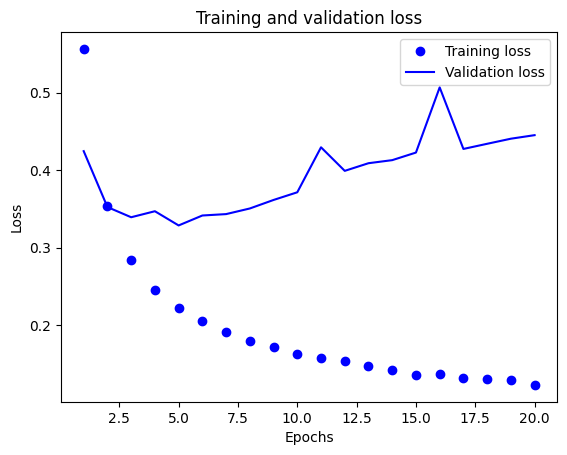

In [111]:
# Get loss values from the history of model_regulize
loss_values_regulize = history_dict_regulize["loss"]
val_loss_values_regulize = history_dict_regulize["val_loss"]
epochs_regulize = range(1, len(loss_values_regulize) + 1)

# Plot the training and validation loss
plt.plot(epochs_regulize, loss_values_regulize, "bo", label="Training loss")
plt.plot(epochs_regulize, val_loss_values_regulize, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Graph: Traning vs Validation Accuracy


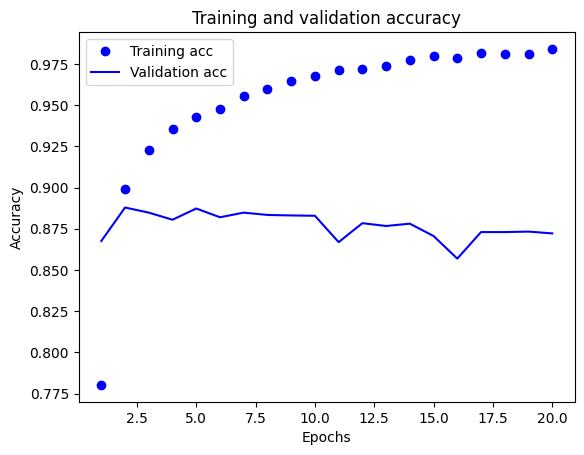

In [112]:
# Clear the current figure
plt.clf()

# Get accuracy values from the history of model_regulize
acc_regulize = history_dict_regulize["accuracy"]
val_acc_regulize = history_dict_regulize["val_accuracy"]

# Plot the training and validation accuracy
plt.plot(epochs_regulize, acc_regulize, "bo", label="Training acc")
plt.plot(epochs_regulize, val_acc_regulize, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [113]:
model_regulize.fit(x_train_new, y_train_new, epochs=8, batch_size=512)
results_reg = model_regulize.evaluate(x_test_new, y_test_new)
results_reg

Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2464 - accuracy: 0.9387
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1995 - accuracy: 0.9514
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1876 - accuracy: 0.9543
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1728 - accuracy: 0.9615
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1704 - accuracy: 0.9616
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1635 - accuracy: 0.9639
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1603 - accuracy: 0.9657
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.4464 - accuracy: 0.8660


[0.4464309513568878, 0.8660399913787842]

Dropout

In [114]:
from tensorflow.keras.layers import Dropout

# Create and compile the new model (dropout_model)
dropout_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    Dropout(0.5),
    layers.Dense(16, activation="relu"),
    Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
dropout_model.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

# Train the new model
history_dropout = dropout_model.fit(partial_x_train_new,
                                    partial_y_train_new,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(x_val_new, y_val_new))

# Get the history dictionary
history_dict_dropout = history_dropout.history
history_keys_dropout = history_dict_dropout.keys()


Epoch 1/20
30/30 [==============================] - 4s 51ms/step - loss: 0.6222 - accuracy: 0.6473 - val_loss: 0.5029 - val_accuracy: 0.8457
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5021 - accuracy: 0.7725 - val_loss: 0.3944 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4221 - accuracy: 0.8269 - val_loss: 0.3399 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3686 - accuracy: 0.8594 - val_loss: 0.3013 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3260 - accuracy: 0.8813 - val_loss: 0.2910 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2875 - accuracy: 0.9014 - val_loss: 0.2771 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2491 - accuracy: 0.9145 - val_loss: 0.2781 - val_accuracy: 0.8892
Epoch 8/20
30

Graph : Traning vs Validation Loss

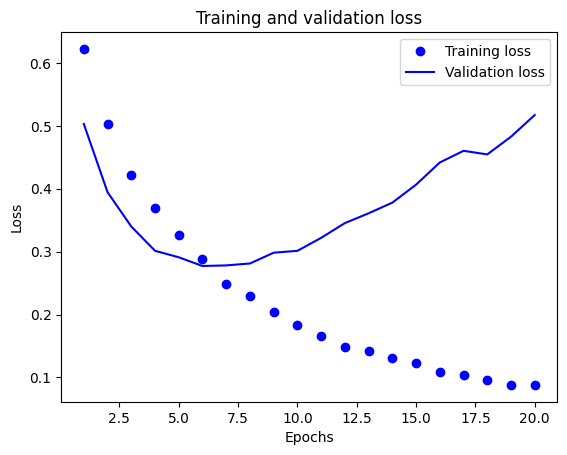

In [115]:
# Get loss values from the history of dropout_model
loss_values_dropout = history_dict_dropout["loss"]
val_loss_values_dropout = history_dict_dropout["val_loss"]
epochs_dropout = range(1, len(loss_values_dropout) + 1)

# Plot the training and validation loss
plt.plot(epochs_dropout, loss_values_dropout, "bo", label="Training loss")
plt.plot(epochs_dropout, val_loss_values_dropout, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Graph: Training vs Validation accuracy

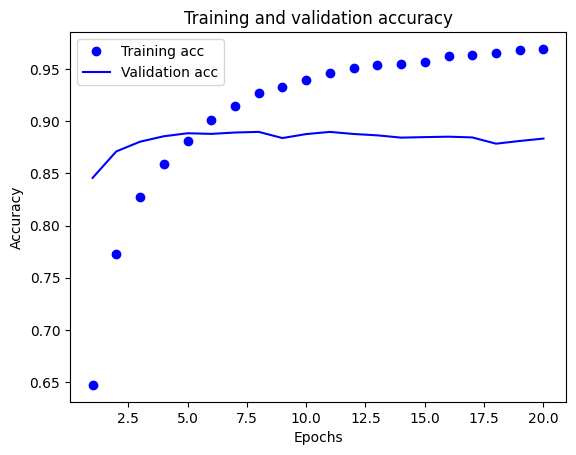

In [116]:
# Clear the current figure
plt.clf()

# Get accuracy values from the history of dropout_model
acc_dropout = history_dict_dropout["accuracy"]
val_acc_dropout = history_dict_dropout["val_accuracy"]

# Plot the training and validation accuracy
plt.plot(epochs_dropout, acc_dropout, "bo", label="Training acc")
plt.plot(epochs_dropout, val_acc_dropout, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [117]:
dropout_model.fit(x_train_new, y_train_new, epochs=8, batch_size=512)
results_Dropout = dropout_model.evaluate(x_test_new, y_test_new)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2670 - accuracy: 0.9201
Epoch 2/8
49/49 [==============================] - 1s 10ms/step - loss: 0.2070 - accuracy: 0.9300
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1895 - accuracy: 0.9358
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1756 - accuracy: 0.9402
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1595 - accuracy: 0.9407
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1532 - accuracy: 0.9464
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1463 - accuracy: 0.9454
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.4753 - accuracy: 0.8687


[0.4752695560455322, 0.8687199950218201]

Model traning with hypertunned parameters

In [118]:
from tensorflow.keras import regularizers

# Create and compile the new model (hyper_model)
hyper_model = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
hyper_model.compile(optimizer="rmsprop",
                    loss="mse",
                    metrics=["accuracy"])

# Train the new model
history_hyper = hyper_model.fit(partial_x_train_new,
                                partial_y_train_new,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_val_new, y_val_new))

# Get the history dictionary
history_dict_hyper = history_hyper.history
history_keys_hyper = history_dict_hyper.keys()


Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2454 - accuracy: 0.5933 - val_loss: 0.1846 - val_accuracy: 0.8134
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1870 - accuracy: 0.7585 - val_loss: 0.1298 - val_accuracy: 0.8556
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1424 - accuracy: 0.8369 - val_loss: 0.1098 - val_accuracy: 0.8674
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1164 - accuracy: 0.8764 - val_loss: 0.1066 - val_accuracy: 0.8778
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0986 - accuracy: 0.8998 - val_loss: 0.0998 - val_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0863 - accuracy: 0.9141 - val_loss: 0.0973 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0768 - accuracy: 0.9271 - val_loss: 0.1011 - val_accuracy: 0.8853
Epoch 8/20
30

Graph: Taning vs validation loss

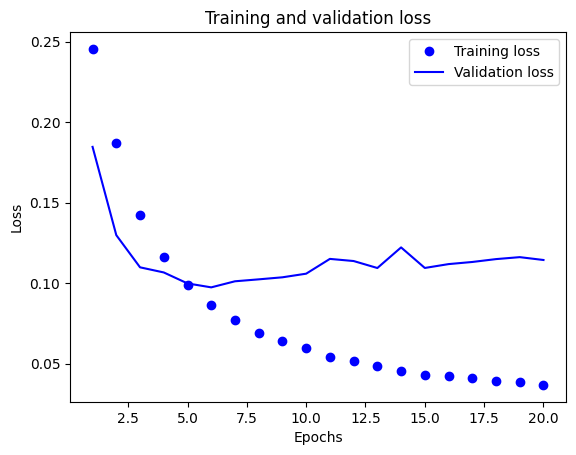

In [119]:
# Get loss values from the history of hyper_model
loss_values_hyper = history_dict_hyper["loss"]
val_loss_values_hyper = history_dict_hyper["val_loss"]
epochs_hyper = range(1, len(loss_values_hyper) + 1)

# Plot the training and validation loss
plt.plot(epochs_hyper, loss_values_hyper, "bo", label="Training loss")
plt.plot(epochs_hyper, val_loss_values_hyper, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Graph :  Training VS Validation accuracy

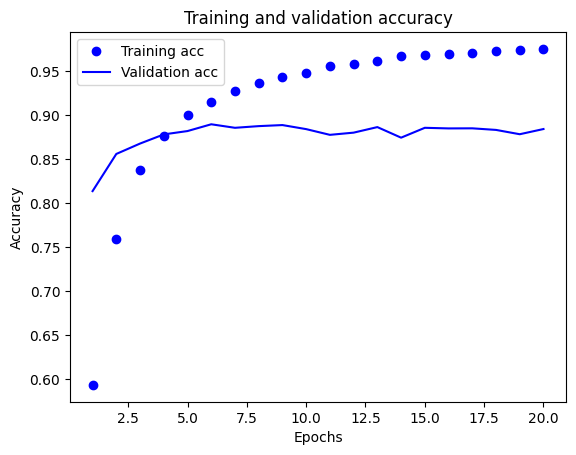

In [120]:
# Clear the current figure
plt.clf()

# Get accuracy values from the history of hyper_model
acc_hyper = history_dict_hyper["accuracy"]
val_acc_hyper = history_dict_hyper["val_accuracy"]

# Plot the training and validation accuracy
plt.plot(epochs_hyper, acc_hyper, "bo", label="Training acc")
plt.plot(epochs_hyper, val_acc_hyper, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [121]:
hyper_model.fit(x_train_new, y_train_new, epochs=8, batch_size=512)
results_Hyper = hyper_model.evaluate(x_test_new, y_test_new)
results_Hyper


Epoch 1/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0730 - accuracy: 0.9304
Epoch 2/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0644 - accuracy: 0.9403
Epoch 3/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0596 - accuracy: 0.9470
Epoch 4/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0576 - accuracy: 0.9503
Epoch 5/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0527 - accuracy: 0.9552
Epoch 6/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0512 - accuracy: 0.9571
Epoch 7/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0492 - accuracy: 0.9590
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.1166 - accuracy: 0.8772


[0.11661922186613083, 0.8771600127220154]

Summurizing all model

In [122]:
All_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_reg[0],results_tanh[0]])*100
All_Loss
All_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_reg[1],results_tanh[1]])*100
All_Accuracy
Labels=['Model_Dropout','hyper_model','Model_MSE','model_regulize','tanh_model']

plt.clf()

<Figure size 640x480 with 0 Axes>

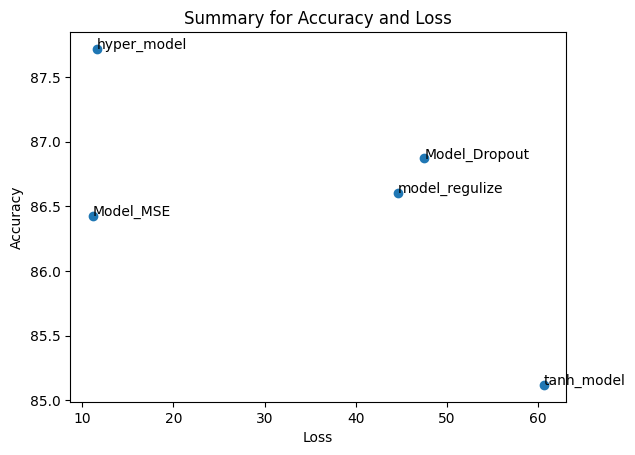

In [123]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

The choice of the loss function plays a critical role in assessing the model's performance and aligning it with the specific task at hand. The binary cross-entropy loss function is primarily used to evaluate classification models. It quantifies how well a model's predictions, which are probability values between 0 and 1, match the actual class labels. This makes it the preferred choice for classification tasks, where the goal is to classify data into discrete categories. On the other hand, mean squared error (MSE) is a more suitable loss function for regression problems. In regression, the model predicts continuous values, and MSE measures the average squared difference between these predictions and the actual target values.

MSE tells us how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line and squaring them. The squaring is necessary to remove any negative signs.

From graph we can say that Maximun accuracy and loss were achieved using hyper_model. We employed three thick layers (32,32,16) with a drop out rate of 0.5 for each. We utilize MSE to compare the model MSE loss to any other model (other than Final Hypertuned Model) With MSE, we observe that the loss is negligible.

impact of changing the number of units (neurons) in a layer is quite interesting.  increased the number of units from 16 to 32, 64, and 128, the accuracy of model changed very little, while the loss function decreased.

increasing the number of hidden layers from 1 to 3 had no significant effect on the loss function, accuracy, or deflection is intriguing.

when used "mse" (mean squared error) as the loss function for the IMDB dataset, the loss value was minimal when compared to binary cross-entropy is noteworthy.

"tanh" activation function led to lower accuracy and performance due to the vanishing gradient problem is valid and highlights an essential consideration in deep learning.

when compared to the initial model, the use of regularization techniques resulted in a much smaller loss and reduced overfitting.

the value of dropout as a regularization technique for preventing overfitting and promoting better generalization in deep neural networks.
